In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
df=pd.read_excel("d://new_jet.xlsx")

In [4]:
df.head(3)

,CustID,Name_First,Name_Last,Address,City,Postal,Phone,Type,Num_Games,Avg_Seats,Tot_Sales,LastTransYear,LastTransMonth,Sex,Income,Marital Status,Age,Fan Club Member,Automobile,Subscription
0,1,C,Dale,92 Concord Cres,London,N6G1X8,519471-1712,Personal,3,3,630,2001,2,Male,57819.0,Single,40.0,0.0,1.0,Free Press
1,2,A,Gill,11 Kingspark Cres,London,N6A5B9,519858-4812,Personal,1,2,140,2000,9,Male,71938.0,Single,44.0,0.0,1.0,NaN
2,3,D,Rodriguez,300 Dundas St,London,N6J4Y5,519685-3997,Personal,1,2,50,2001,10,Male,23891.0,Married,24.0,0.0,1.0,NaN


In [5]:
df.shape

(3000, 20)

In [6]:
df.isnull().sum()

CustID                0
Name_First          533
Name_Last             0
Address             773
City                129
Postal              140
Phone               129
Type                  0
Num_Games             0
Avg_Seats             0
Tot_Sales             0
LastTransYear         0
LastTransMonth        0
Sex                   0
Income              528
Marital Status      528
Age                 528
Fan Club Member     528
Automobile          528
Subscription       2140
dtype: int64

In [7]:
df.City.value_counts()

London         2854
Hyde Park         3
Lodnon            2
Brampton          2
Mississauga       2
Ingersoll         2
Toronto           2
Hamilton          1
Hagersville       1
Landon            1
York              1
Name: City, dtype: int64

<AxesSubplot:>

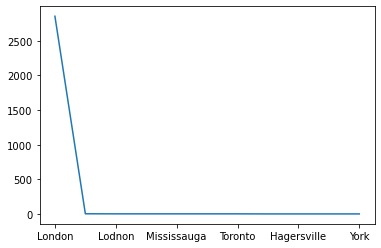

In [8]:
df.City.value_counts().plot(kind='line')

In [9]:
df.columns

Index(['CustID', 'Name_First', 'Name_Last', 'Address', 'City', 'Postal',
       'Phone', 'Type', 'Num_Games', 'Avg_Seats', 'Tot_Sales', 'LastTransYear',
       'LastTransMonth', 'Sex', 'Income', 'Marital Status', 'Age',
       'Fan Club Member', 'Automobile', 'Subscription'],
      dtype='object')

In [10]:
df['City'] = df['City'].replace(['Landon' , 'Lodnon'], 'London')

In [11]:
df.City.value_counts()

London         2857
Hyde Park         3
Brampton          2
Mississauga       2
Ingersoll         2
Toronto           2
Hamilton          1
Hagersville       1
York              1
Name: City, dtype: int64

In [12]:
data= df[df['City']=='London']

In [13]:
data.head(3)

,CustID,Name_First,Name_Last,Address,City,Postal,Phone,Type,Num_Games,Avg_Seats,Tot_Sales,LastTransYear,LastTransMonth,Sex,Income,Marital Status,Age,Fan Club Member,Automobile,Subscription
0,1,C,Dale,92 Concord Cres,London,N6G1X8,519471-1712,Personal,3,3,630,2001,2,Male,57819.0,Single,40.0,0.0,1.0,Free Press
1,2,A,Gill,11 Kingspark Cres,London,N6A5B9,519858-4812,Personal,1,2,140,2000,9,Male,71938.0,Single,44.0,0.0,1.0,NaN
2,3,D,Rodriguez,300 Dundas St,London,N6J4Y5,519685-3997,Personal,1,2,50,2001,10,Male,23891.0,Married,24.0,0.0,1.0,NaN


In [14]:
data.shape

(2857, 20)

In [15]:
data.Income.min()

98.0

In [16]:
data.Tot_Sales.min()

25

In [17]:
data.dtypes

CustID               int64
Name_First          object
Name_Last           object
Address             object
City                object
Postal              object
Phone               object
Type                object
Num_Games            int64
Avg_Seats            int64
Tot_Sales            int64
LastTransYear        int64
LastTransMonth       int64
Sex                 object
Income             float64
Marital Status      object
Age                float64
Fan Club Member    float64
Automobile         float64
Subscription        object
dtype: object

In [18]:
data['LastTransYear']=data['LastTransYear'].astype(str)

C:\Users\User\AppData\Local\Temp/ipykernel_16732/486610996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LastTransYear']=data['LastTransYear'].astype(str)


In [19]:
data['LastTransMonth']=data['LastTransMonth'].astype(str)

C:\Users\User\AppData\Local\Temp/ipykernel_16732/3308200066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LastTransMonth']=data['LastTransMonth'].astype(str)


In [20]:
data['new_year']=pd.to_datetime(data['LastTransYear']+"/"+ data['LastTransMonth'])

C:\Users\User\AppData\Local\Temp/ipykernel_16732/1830411532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_year']=pd.to_datetime(data['LastTransYear']+"/"+ data['LastTransMonth'])


In [21]:
data.drop(['LastTransYear','LastTransMonth'],axis=1,inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
data.new_year.max()

Timestamp('2001-12-01 00:00:00')

In [23]:
from datetime import date
current_date= date(2001,12,2)
current_date.strftime("%Y-%m-%d")

'2001-12-02'

In [24]:
current_date

datetime.date(2001, 12, 2)

In [25]:
data=data[['CustID', 'City', 'Num_Games', 'Avg_Seats', 'Tot_Sales', 'Income',
        'Fan Club Member', 'Automobile','Subscription','new_year']]

In [26]:
data.head(3)

,CustID,City,Num_Games,Avg_Seats,Tot_Sales,Income,Fan Club Member,Automobile,Subscription,new_year
0,1,London,3,3,630,57819.0,0.0,1.0,Free Press,2001-02-01
1,2,London,1,2,140,71938.0,0.0,1.0,NaN,2000-09-01
2,3,London,1,2,50,23891.0,0.0,1.0,NaN,2001-10-01


In [27]:
data['current_data']=current_date

In [28]:
data[['new_year','current_data']] = data[['new_year','current_data']].apply(pd.to_datetime)



In [29]:
#calculate difference between dates
data['Recency'] = (data['current_data'] - data['new_year']) / np.timedelta64(1, 'D')

In [30]:
data['Recency']=data['Recency'].astype(int)

In [31]:
data.head(3)

,CustID,City,Num_Games,Avg_Seats,Tot_Sales,Income,Fan Club Member,Automobile,Subscription,new_year,current_data,Recency
0,1,London,3,3,630,57819.0,0.0,1.0,Free Press,2001-02-01,2001-12-02,304
1,2,London,1,2,140,71938.0,0.0,1.0,NaN,2000-09-01,2001-12-02,457
2,3,London,1,2,50,23891.0,0.0,1.0,NaN,2001-10-01,2001-12-02,62


In [32]:
data['frequency']=data['Num_Games']*data['Avg_Seats']

In [33]:
data.head(3)

,CustID,City,Num_Games,Avg_Seats,Tot_Sales,Income,Fan Club Member,Automobile,Subscription,new_year,current_data,Recency,frequency
0,1,London,3,3,630,57819.0,0.0,1.0,Free Press,2001-02-01,2001-12-02,304,9
1,2,London,1,2,140,71938.0,0.0,1.0,NaN,2000-09-01,2001-12-02,457,2
2,3,London,1,2,50,23891.0,0.0,1.0,NaN,2001-10-01,2001-12-02,62,2


In [34]:
data['Monetary']=data['Tot_Sales']

In [35]:
data.reset_index().head()

,index,CustID,City,Num_Games,Avg_Seats,Tot_Sales,Income,Fan Club Member,Automobile,Subscription,new_year,current_data,Recency,frequency,Monetary
0,0,1,London,3,3,630,57819.0,0.0,1.0,Free Press,2001-02-01,2001-12-02,304,9,630
1,1,2,London,1,2,140,71938.0,0.0,1.0,NaN,2000-09-01,2001-12-02,457,2,140
2,2,3,London,1,2,50,23891.0,0.0,1.0,NaN,2001-10-01,2001-12-02,62,2,50
3,3,4,London,1,3,75,37231.0,0.0,0.0,NaN,2001-09-01,2001-12-02,92,3,75
4,4,5,London,3,4,660,NaN,NaN,NaN,NaN,1998-10-01,2001-12-02,1158,12,660


In [36]:
RFM=data[['CustID','Recency','frequency','Monetary']]

In [37]:
RFM.Recency.describe()

count    2857.000000
mean      555.070354
std       408.971182
min         1.000000
25%       215.000000
50%       457.000000
75%       854.000000
max      1431.000000
Name: Recency, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


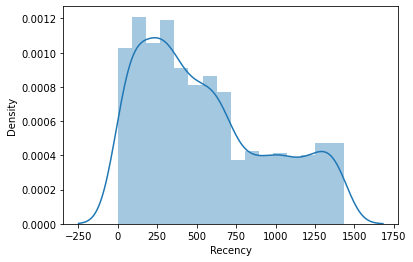

In [38]:
import seaborn as sns
x=RFM['Recency']
ax=sns.distplot(x)

In [39]:
RFM.frequency.describe() 

count    2857.000000
mean        9.765488
std         7.347013
min         1.000000
25%         4.000000
50%         8.000000
75%        14.000000
max        72.000000
Name: frequency, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


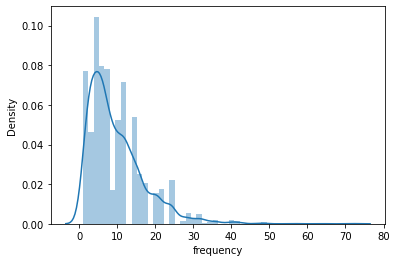

In [40]:
x=RFM['frequency']
ax=sns.distplot(x)

In [41]:
RFM.Monetary.describe() 

count    2857.00000
mean      470.60203
std       406.50127
min        25.00000
25%       175.00000
50%       350.00000
75%       640.00000
max      4410.00000
Name: Monetary, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


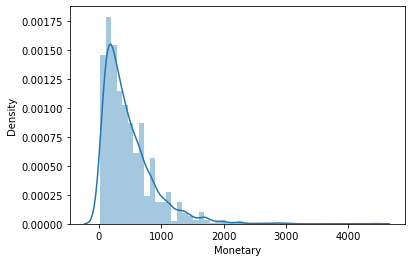

In [42]:
x=RFM['Monetary']
ax=sns.distplot(x)

In [43]:
RFM.columns

Index(['CustID', 'Recency', 'frequency', 'Monetary'], dtype='object')

In [44]:
RFM['R_rank'] = RFM['Recency'].rank(ascending=False)
RFM['F_rank'] = RFM['frequency'].rank(ascending=True)
RFM['M_rank'] = RFM['Monetary'].rank(ascending=True)

C:\Users\User\AppData\Local\Temp/ipykernel_16732/1251791386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['R_rank'] = RFM['Recency'].rank(ascending=False)
C:\Users\User\AppData\Local\Temp/ipykernel_16732/1251791386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['F_rank'] = RFM['frequency'].rank(ascending=True)
C:\Users\User\AppData\Local\Temp/ipykernel_16732/1251791386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [45]:
RFM['R_rank_norm'] = (RFM['R_rank']/RFM['R_rank'].max())*100
RFM['F_rank_norm'] = (RFM['F_rank']/RFM['F_rank'].max())*100
RFM['M_rank_norm'] = (RFM['F_rank']/RFM['M_rank'].max())*100
 
RFM.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
RFM.head()

C:\Users\User\AppData\Local\Temp/ipykernel_16732/4472617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['R_rank_norm'] = (RFM['R_rank']/RFM['R_rank'].max())*100
C:\Users\User\AppData\Local\Temp/ipykernel_16732/4472617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['F_rank_norm'] = (RFM['F_rank']/RFM['F_rank'].max())*100
C:\Users\User\AppData\Local\Temp/ipykernel_16732/4472617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,CustID,Recency,frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1,304,9,630,66.524293,56.037802,56.037802
1,2,457,2,140,51.503826,6.177809,6.177809
2,3,62,2,50,93.949101,6.177809,6.177809
3,4,92,3,75,90.425343,14.263213,14.263213
4,5,1158,12,660,12.813668,69.740987,69.740987


In [46]:
RFM['RFM_Score'] = 0.15*RFM['R_rank_norm']+0.28 * \
    RFM['F_rank_norm']+0.57*RFM['M_rank_norm']
RFM['RFM_Score'] *= 0.05
RFM=RFM.round(2)
RFM[['CustID', 'RFM_Score']].head(7)

C:\Users\User\AppData\Local\Temp/ipykernel_16732/1577273932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['RFM_Score'] = 0.15*RFM['R_rank_norm']+0.28 * \
C:\Users\User\AppData\Local\Temp/ipykernel_16732/1577273932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['RFM_Score'] *= 0.05


,CustID,RFM_Score
0,1,2.88
1,2,0.65
2,3,0.97
3,4,1.28
4,5,3.06
5,6,1.23
6,7,1.63


# Rating Customer based upon the RFM score
rfm score >4.5 : Top Customer

4.5 > rfm score > 4 : High Value Customer

4>rfm score >3 : Medium value customer

3>rfm score>1.6 : Low-value customer

rfm score<1.6 :Lost Customer

In [47]:
RFM["Customer_segment"] = np.where(RFM['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        RFM['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
   RFM['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(RFM['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
RFM[['CustID', 'RFM_Score', 'Customer_segment']].head(20)

,CustID,RFM_Score,Customer_segment
0,1,2.88,Low Value Customers
1,2,0.65,Lost Customers
2,3,0.97,Lost Customers
3,4,1.28,Lost Customers
4,5,3.06,Medium Value Customer
5,6,1.23,Lost Customers
6,7,1.63,Low Value Customers
7,8,3.29,Medium Value Customer
8,9,2.04,Low Value Customers
9,10,3.48,Medium Value Customer


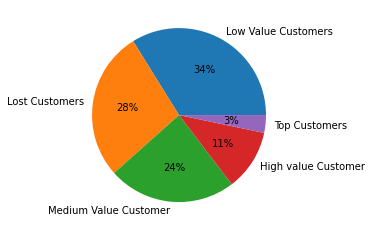

In [48]:
import matplotlib.pyplot as plt
plt.pie(RFM.Customer_segment.value_counts(),
        labels=RFM.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()